___
# Ciência dos Dados - PROJETO 3 - INSPER

___
## Guilherme Leite

## Gabriel Brey

## Leonardo Neves

___

___

## INTRODUÇÃO

A indústria cinematográfica é umas das maiores do mercado de entretenimento, movimentando bilhões de dólares anualmente, com alguns filmes recentes com orçamentos de até 400 milhões de dólares, o objetivo do projeto é estimar o rendimento de um filme em relação a época do ano que é lançado e seu orçamento.

A base de dados contém informações de aproximadamente 5000 filmes do site TMDB, que concentra vários dados sobre a produção, gênero, entre outros de peças cinematográficas.


___
## MINERANDO DADOS e CARACTERÍSTICAS DO DATASET

Os dados que serão utilizados serão o revenue, budget e release date. O revenue se refere a quanto o filme faturou em todo o mundo em dólares americanos, o budget é referente ao orçamento do filme, também em dólares americanos e o release date é a data de lançamento mundial no formato dia/mês/ano

In [139]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

In [140]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Leonardo\OneDrive\insper\dps_2018\ciencia_dos_dados\DPCD-master\Projeto3


### BASE DE DADOS

In [141]:
tmdb = pd.read_csv('tmdb_5000_movies.csv', encoding='latin1')#Abre o dataframe inteiro

data = tmdb[['revenue','budget','release_date','vote_count','popularity','vote_average']]#Separa as colunas
data = data[~(data == 0).any(axis=1)] #remove filmes que tenham, algum dos dados igual a 0
nndf = data[pd.notnull(data.revenue)&pd.notnull(data.budget)]#Tira os "NaN" do df
nndf = nndf.reset_index(drop=True)#Reseta o index dos filmes
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bondâs past sends him...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [142]:
for i in range (len(nndf)): #Deixa a data de lançamento como só o mes envez de DD/MM/YYYY
    Str = str(nndf.release_date[i])	
    SStr = Str.split('-')
    nndf.release_date[i] = SStr[1]

C:\Users\Leonardo\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### ANÁLISE DESCRITIVA

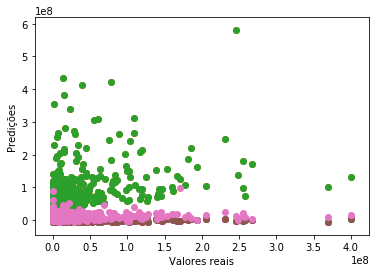

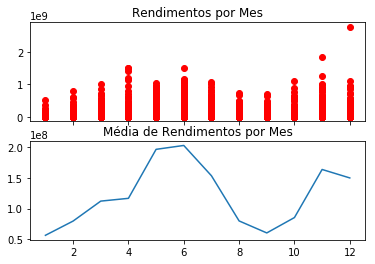

In [143]:
f, axarr = plt.subplots(2, sharex=True)

Y = nndf['revenue']
X = nndf[['release_date']]
axarr[0].plot(X,Y,'ro')
axarr[0].set_title('Rendimentos por Mes')

X2  = ['01','02','03','04','05','06','07','08','09','10','11','12',]
Y2 = [nndf.loc[nndf['release_date'] == '01'].mean()[0],nndf.loc[nndf['release_date'] == '02'].mean()[0],
nndf.loc[nndf['release_date'] == '03'].mean()[0],nndf.loc[nndf['release_date'] == '04'].mean()[0],
nndf.loc[nndf['release_date'] == '05'].mean()[0],nndf.loc[nndf['release_date'] == '06'].mean()[0],
nndf.loc[nndf['release_date'] == '07'].mean()[0],nndf.loc[nndf['release_date'] == '08'].mean()[0],
nndf.loc[nndf['release_date'] == '09'].mean()[0],nndf.loc[nndf['release_date'] == '10'].mean()[0],
nndf.loc[nndf['release_date'] == '11'].mean()[0],nndf.loc[nndf['release_date'] == '12'].mean()[0]]
axarr[1].plot(X2,Y2)
axarr[1].set_title('Média de Rendimentos por Mes')

plt.show()

Os gráficos acima mostram como o revenue dos filmes ocorre nos meses do ano, é possível perceber que os meses de Maio, Junho , Julho, Novembro tem um maior rendimento médio.

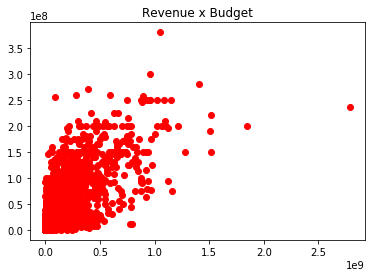

In [144]:
plt.plot(nndf['revenue'],nndf['budget'],'ro')
plt.title('Revenue x Budget')
plt.show()

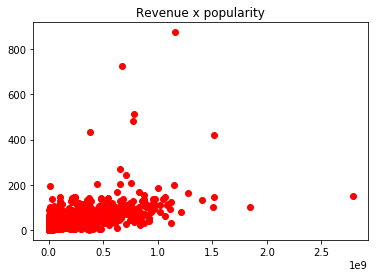

In [149]:

plt.plot(nndf['revenue'],nndf['popularity'],'ro')
plt.title('Revenue x popularity')
plt.show()

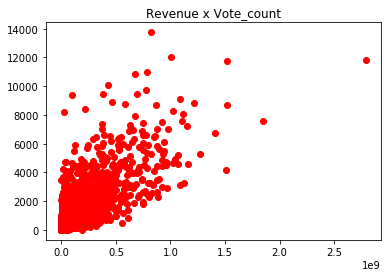

In [150]:

plt.plot(nndf['revenue'],nndf['vote_count'],'ro')
plt.title('Revenue x Vote_count')
plt.show()

Como é possível perber pelo gráfico, existe algum tipo de relação linear entre o Budget e o Revenue dos filmes

___
## MODELOS DE PREDIÇÃO

[O tópico C.PROCESSO E ESTATÍSTICAS DE VALIDAÇÃO estará dentro deste tópico. Organize-o aqui de forma clara!]

[ORGANIZE AQUI TODOS OS MODELOS DE PREDIÇÃO NECESSÁRIOS NESTE PROJETO!]

In [151]:
x = len (nndf)
nndf.sample(frac=1)# Aleatoriza o index de cada filme
DfTrain = nndf.iloc[:int(0.8*x)]# separa os filmes de 75% primeiros filmes como Treinamento
DfTrain = DfTrain.reset_index(drop=True)#Reseta o index dos filmes
DfTest = nndf.iloc[int(0.8*x):]# separa os filmes de 25% últimos filmes como Teste
DfTest = DfTest.reset_index(drop=True)#Reseta o index dos filmes

print("Valores para o dataframe de treinamento\n",DfTrain.describe())
print("\nValores para o dataframe de teste\n",DfTest.describe())

Valores para o dataframe de treinamento
             revenue        budget    vote_count   popularity  vote_average
count  2.581000e+03  2.581000e+03   2581.000000  2581.000000   2581.000000
mean   1.452437e+08  4.987577e+07   1117.814800    32.171651      6.257691
std    2.000793e+08  4.516085e+07   1517.604562    38.790683      0.846447
min    1.100000e+01  1.000000e+01      2.000000     0.034259      2.300000
25%    3.000000e+07  2.000000e+07    232.000000    12.739721      5.700000
50%    7.627045e+07  3.500000e+07    559.000000    23.441135      6.300000
75%    1.730467e+08  6.500000e+07   1344.000000    40.723459      6.800000
max    2.787965e+09  3.800000e+08  13752.000000   875.581305      8.500000

Valores para o dataframe de teste
             revenue        budget   vote_count  popularity  vote_average
count  6.460000e+02  6.460000e+02   646.000000  646.000000    646.000000
mean   2.572675e+07  3.933498e+06   418.856037   16.585344      6.535294
std    4.571949e+07  3.309180

As médias e desvios padrão para ambos os dataframes são muito próximos, dessa forma, é possível dizer que ambos tem as mesmas características e serão menos suscetíveis a overfitting e underfitting.  

In [152]:
from sklearn import linear_model
from sklearn import metrics
import numpy as np
import statsmodels.api as sm
from sklearn import datasets

X = DfTrain[['release_date','budget']].round(0).astype(int)
X = X.values.reshape((len(X),2))
X2 = DfTrain[['release_date','vote_count']].round(0).astype(int)
X2 = X2.values.reshape((len(X2),2))
X3 = DfTrain[['release_date','vote_count','budget']].round(0).astype(int)
X3 = X3.values.reshape((len(X3),3))
X4 = DfTrain[['release_date','vote_count','budget','popularity']].round(0).astype(int)
X4 = X4.values.reshape((len(X4),4))

Y = DfTrain['revenue'].round(0).astype(int)
Y = Y.values.reshape((len(Y),1))

XTest = DfTest[['release_date','vote_count']].round(0).astype(int)
XTest = XTest.values.reshape((len(XTest),2))
#XTest1 = DfTest['release_date'].round(0).astype(int)
#XTest1 = XTest1.values.reshape((len(XTest1),1))

X2Test = DfTest[['release_date','budget']].round(0).astype(int)
X2Test = X2Test.values.reshape((len(X2Test),2))
X3Test = DfTest[['release_date','vote_count','budget']].round(0).astype(int)
X3Test = X3Test.values.reshape((len(X3Test),3))
X4Test = DfTest[['release_date','vote_count','budget','popularity']].round(0).astype(int)
X4Test = X4Test.values.reshape((len(X4Test),4))
YTest = DfTest['revenue'].round(0).astype(int)
YTest = YTest.values.reshape((len(YTest),1))

Predição pela media 

In [153]:
media = DfTrain.revenue.mean()

S =  (DfTrain.revenue-media)**2
ss = S.sum()
RMS = (ss/len( DfTrain.revenue))**(1/2)

print(media)
print("R2 é igual a zero uma vez que fi é igual a media de y: 1 - ((yi-fi)/(yi-yb)) = 0")
print("RMS da Predição pela media:", RMS)


145243709.07748935
R2 é igual a zero uma vez que fi é igual a media de y: 1 - ((yi-fi)/(yi-yb)) = 0
RMS da Predição pela media: 200040499.9288417


MODELO DE REGRESSÃO LINEAR ( ordinary least squares):

In [154]:
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit() 
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     1021.
Date:                Tue, 05 Jun 2018   Prob (F-statistic):               0.00
Time:                        12:05:17   Log-Likelihood:                -52189.
No. Observations:                2581   AIC:                         1.044e+05
Df Residuals:                    2578   BIC:                         1.044e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.992e+06   7.35e+06     -0.816      0.415   -2.04e+07    8.42e+06
x1          8.265e+05   8.53e+05      0.969      0.333   -8.46e+05     2.5e+06
x2             2.8825      0.064     45.159      0.000       2.757       3.008
==============================================================================
Omnibus:                      919.224   Durbin-Watson:                   1.511
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            88373.795
Skew:                           0.716   Prob(JB):                         0.00
Kurtosis:                      31.631   Cond. No.                     1.72e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [168]:
lm = linear_model.LinearRegression()
model = lm.fit(X, Y)
predictions = lm.predict(X2Test)
plt.scatter(YTest, predictions)
plt.xlabel("Valores reais")
plt.ylabel("Predições")

ValueError: shapes (646,2) and (3,1) not aligned: 2 (dim 1) != 3 (dim 0)

In [156]:
model.score(X2Test,Ytest)

NameError: name 'Ytest' is not defined

In [157]:
X2 = sm.add_constant(X2)
model2 = sm.OLS(Y,X2).fit() 
predictions2 = model2.predict(X2)
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     1331.
Date:                Tue, 05 Jun 2018   Prob (F-statistic):               0.00
Time:                        12:05:22   Log-Likelihood:                -52026.
No. Observations:                2581   AIC:                         1.041e+05
Df Residuals:                    2578   BIC:                         1.041e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.759e+07   6.52e+06      5.763      0.000    2.48e+07    5.04e+07
x1          4.511e+05   8.01e+05      0.563      0.573   -1.12e+06    2.02e+06
x2          9.198e+04   1783.729     51.566      0.000    8.85e+04    9.55e+04
==============================================================================
Omnibus:                     1406.593   Durbin-Watson:                   1.395
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           389626.525
Skew:                          -1.379   Prob(JB):                         0.00
Kurtosis:                      63.128   Cond. No.                     4.57e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [159]:
X3 = sm.add_constant(X3)
model3 = sm.OLS(Y,X3).fit() 
predictions3 = model3.predict(X3)
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     1430.
Date:                Tue, 05 Jun 2018   Prob (F-statistic):               0.00
Time:                        12:05:25   Log-Likelihood:                -51677.
No. Observations:                2581   AIC:                         1.034e+05
Df Residuals:                    2577   BIC:                         1.034e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.889e+07   6.04e+06     -3.129      0.002   -3.07e+07   -7.05e+06
x1          4.556e+05      7e+05      0.651      0.515   -9.16e+05    1.83e+06
x2          6.482e+04   1829.801     35.425      0.000    6.12e+04    6.84e+04
x3             1.7406      0.061     28.310      0.000       1.620       1.861
==============================================================================
Omnibus:                     2158.351   Durbin-Watson:                   1.574
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1126710.180
Skew:                          -2.858   Prob(JB):                         0.00
Kurtosis:                     105.197   Cond. No.                     1.73e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [160]:
X4 = sm.add_constant(X4)
model4 = sm.OLS(Y,X4).fit() 
predictions4 = model4.predict(X4)
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     1094.
Date:                Tue, 05 Jun 2018   Prob (F-statistic):               0.00
Time:                        12:05:25   Log-Likelihood:                -51660.
No. Observations:                2581   AIC:                         1.033e+05
Df Residuals:                    2576   BIC:                         1.034e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.401e+07   6.06e+06     -3.959      0.000   -3.59e+07   -1.21e+07
x1          4.347e+05   6.95e+05      0.625      0.532   -9.28e+05     1.8e+06
x2          5.537e+04   2438.862     22.705      0.000    5.06e+04    6.02e+04
x3             1.7236      0.061     28.179      0.000       1.604       1.843
x4          5.183e+05   8.92e+04      5.812      0.000    3.43e+05    6.93e+05
==============================================================================
Omnibus:                     2136.256   Durbin-Watson:                   1.551
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1047054.046
Skew:                          -2.820   Prob(JB):                         0.00
Kurtosis:                     101.511   Cond. No.                     1.74e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [161]:
XTest = sm.add_constant(XTest)
predictions = model.predict(XTest)
predictions

array([[-1032138.3841446 ],
       [ 2272134.53174002],
       [ 1449229.82941674],
       [-5163112.23432995],
       [ 3926259.90393019],
       [ 2272883.97768849],
       [ 2272223.88875695],
       [-2686422.29297772],
       [-5165496.04894297],
       [-5165720.88272751],
       [-2680700.56140959],
       [-5165484.5190053 ],
       [ -207184.23540069],
       [ 3099247.66131241],
       [ 1451965.30712865],
       [-1859779.00836534],
       [-2686269.52130361],
       [ 3926268.55138345],
       [ 3098774.93386799],
       [  619418.69442985],
       [ -205368.27021786],
       [-5165945.71651205],
       [ 1449209.65202582],
       [-1860024.0195408 ],
       [-2686603.88949601],
       [ 1445984.15196297],
       [-1033135.72375295],
       [-4339486.91090237],
       [-4339437.90866728],
       [ -205077.13929172],
       [ -207008.40385124],
       [ 2272094.17695818],
       [-1859764.59594325],
       [ 3925954.36058197],
       [-5165314.45242469],
       [ 1447508.986

In [162]:
len(predictions)-len(YTest)


0

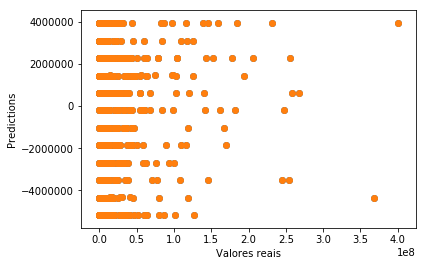

In [166]:
plt.scatter(YTest, predictions)
plt.xlabel('Valores reais')
plt.ylabel('Predictions')
plt.show()

In [165]:
print ("Score"), model.score(XTest, YTest)

Score


(None, -0.32251394468548011)

In [167]:
X = DfTrain['budget'].round(0).astype(int)
X = X.values.reshape((len(X),1))
Y = DfTrain['revenue'].round(0).astype(int)
Y = Y.values.reshape((len(Y),1))

XTest = DfTest['budget'].round(0).astype(int)
XTest = XTest.values.reshape((len(XTest),1))
YTest = DfTest['revenue'].round(0).astype(int)
YTest = YTest.values.reshape((len(YTest),1))}

SyntaxError: invalid syntax (<ipython-input-167-2ab1f829e81a>, line 9)

In [24]:
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit() 
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     2043.
Date:                Tue, 05 Jun 2018   Prob (F-statistic):               0.00
Time:                        10:58:27   Log-Likelihood:                -52229.
No. Observations:                2583   AIC:                         1.045e+05
Df Residuals:                    2581   BIC:                         1.045e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.948e+05   4.29e+06     -0.045      0.964   -8.61e+06    8.22e+06
x1             2.8828      0.064     45.199      0.000       2.758       3.008
==============================================================================
Omnibus:                      921.627   Durbin-Watson:                   1.510
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            87601.763
Skew:                           0.723   Prob(JB):                         0.00
Kurtosis:                      31.493   Cond. No.                     1.00e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

___
## CONCLUSÃO

___
## REFERÊNCIAS BIBLIOGRÁFICAS

https://www.kaggle.com/tmdb/tmdb-movie-metadata - Acessado em 25/05/2018

https://www.themoviedb.org/?language=en - Acessado em 25/05/2018

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html - 
Acessado em 28/05/2018

http://scikit-learn.org/stable/modules/linear_model.html Acessado em 28/05/2018

https://ensinandomaquinasblog.wordpress.com/2017/12/15/modelos-preditivos-de-notas-de-redacao-do-enem-2015/  - Acessado em 25/05/2018

http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate - Acessado em 27/05/2018